<a href="https://colab.research.google.com/github/hangyuCho/MyFirstAngular/blob/master/image_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.4.0


In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [12]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
len(train_images)

60000

In [6]:
test_images.shape

(10000, 28, 28)

In [7]:
len(test_labels)

10000

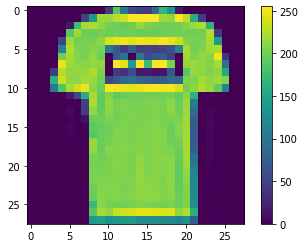

In [9]:
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

In [10]:
train_images = train_images / 255.0
test_images = test_images / 255.0

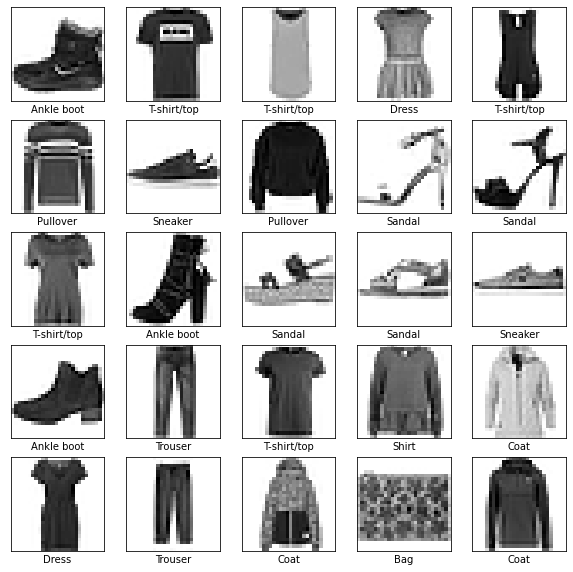

In [13]:
plt.figure(figsize=(10, 10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
plt.show()

In [15]:
model = keras.Sequential([
  keras.layers.Flatten(input_shape=(28, 28)),
  keras.layers.Dense(128, activation='relu'),
  keras.layers.Dense(10, activation='softmax')
])

In [16]:
print(model)

In [18]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [19]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6240 - accuracy: 0.7833
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3819 - accuracy: 0.8622
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3403 - accuracy: 0.8754
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3148 - accuracy: 0.8837
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2965 - accuracy: 0.8912


In [20]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

313/313 - 0s - loss: 0.3659 - accuracy: 0.8705


In [22]:
print('테스트 정확도 : ', test_acc)

테스트 정확도 :  0.8705000281333923


In [24]:
predictions = model.predict(test_images)
predictions[0]

array([3.9707115e-07, 1.0953953e-08, 9.1292748e-08, 1.2970675e-09,
       4.9605831e-09, 1.8292145e-03, 1.2501442e-07, 5.4945587e-03,
       9.4470561e-06, 9.9266618e-01], dtype=float32)

In [25]:
np.argmax(predictions[0])

9

In [35]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else: 
    color = 'red'
  
  plt.xlabel(
    "{} {:2.0f}% ({})".format(class_names[predicted_label],
                                 100*np.max(predictions_array),
                                 class_names[true_label]), 
                                 color=color)
def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')


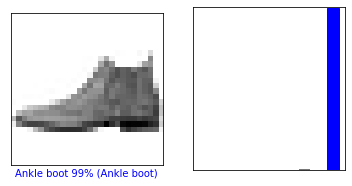

In [38]:
i = 0
plt.figure(figsize=(6, 3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)
plt.show()

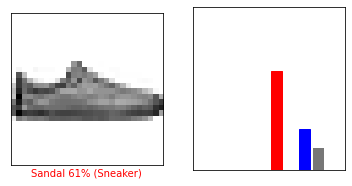

In [39]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)
plt.show()

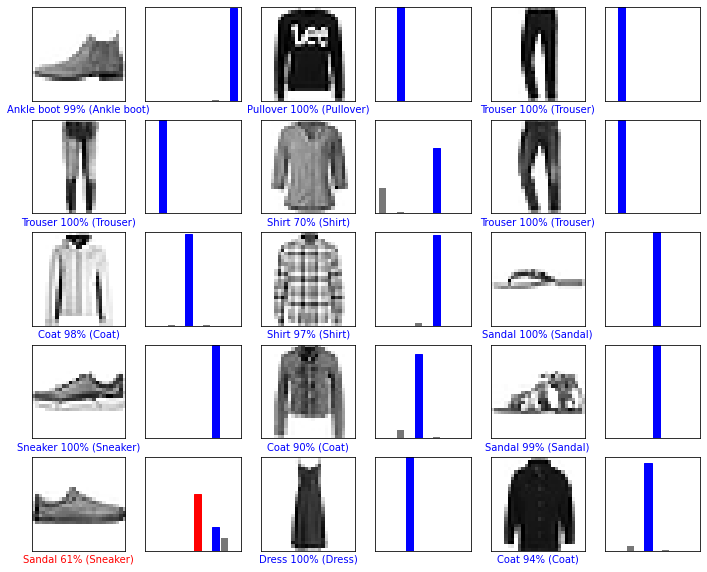

In [40]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

In [41]:
img = test_images[0]
print(img.shape)

(28, 28)


In [42]:
img = (np.expand_dims(img, 0))
print(img.shape)

(1, 28, 28)


In [43]:
predictions_single = model.predict(img)

print(predictions_single)

[[3.9707078e-07 1.0953975e-08 9.1292570e-08 1.2970626e-09 4.9605733e-09
  1.8292128e-03 1.2501442e-07 5.4945587e-03 9.4470561e-06 9.9266618e-01]]


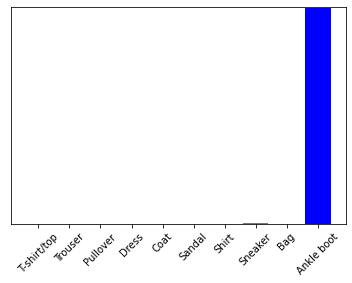

In [44]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [45]:
np.argmax(predictions_single[0])

9